In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/yapwh1208/supermarket-sales-data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: manish
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/yapwh1208/supermarket-sales-data


100%|██████████| 8.47M/8.47M [00:00<00:00, 675MB/s]

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_1 = pd.read_csv('/content/supermarket-sales-data/annex1.csv')
df_2 = pd.read_csv('/content/supermarket-sales-data/annex2.csv')
df_3 = pd.read_csv('/content/supermarket-sales-data/annex3.csv')
df_4 = pd.read_csv('/content/supermarket-sales-data/annex4.csv')

In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Item Code      251 non-null    int64 
 1   Item Name      251 non-null    object
 2   Category Code  251 non-null    int64 
 3   Category Name  251 non-null    object
dtypes: int64(2), object(2)
memory usage: 8.0+ KB


In [6]:
df_1.drop('Category Code', axis = 1, inplace = True)

In [7]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878503 entries, 0 to 878502
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Date                         878503 non-null  object 
 1   Time                         878503 non-null  object 
 2   Item Code                    878503 non-null  int64  
 3   Quantity Sold (kilo)         878503 non-null  float64
 4   Unit Selling Price (RMB/kg)  878503 non-null  float64
 5   Sale or Return               878503 non-null  object 
 6   Discount (Yes/No)            878503 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 46.9+ MB


In [8]:
df_2.drop('Discount (Yes/No)', axis = 1, inplace = True)

In [9]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55982 entries, 0 to 55981
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      55982 non-null  object 
 1   Item Code                 55982 non-null  int64  
 2   Wholesale Price (RMB/kg)  55982 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ MB


In [10]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Item Code      251 non-null    int64  
 1   Item Name      251 non-null    object 
 2   Loss Rate (%)  251 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.0+ KB


In [11]:
df_4.drop('Loss Rate (%)', axis = 1, inplace = True)

In [12]:
merged_df = (
    df_2
    .merge(df_1, on='Item Code', how='inner')
    .merge(df_3, on=['Item Code', 'Date'], how='inner')
    .merge(df_4, on='Item Code', how='inner')
)

In [13]:
merged_df.sample(3)

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Item Name_x,Category Name,Wholesale Price (RMB/kg),Item Name_y
319946,2021-05-28,10:11:55.911,102900005116547,0.452,6.0,sale,Needle Mushroom (1),Edible Mushroom,2.63,Needle Mushroom (1)
797277,2023-02-24,12:18:25.387,102900005116899,0.651,4.8,sale,Net Lotus Root (1),Aquatic Tuberous Vegetables,2.87,Net Lotus Root (1)
694158,2022-10-21,10:24:23.319,102900011030110,1.000,4.5,sale,Spinach (Bag),Flower/Leaf Vegetables,1.89,Spinach (Bag)


In [14]:
merged_df['Item Name_x'].equals(merged_df['Item Name_y'])

True

In [15]:
merged_df.drop(['Item Name_y'], axis =1, inplace = True)

In [16]:
merged_df = merged_df.rename(columns={'Item Name_x': 'Item Name'})

In [17]:
merged_df.head(3)

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Item Name,Category Name,Wholesale Price (RMB/kg)
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,Paopaojiao (Jingpin),Capsicum,4.32
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,Chinese Cabbage,Flower/Leaf Vegetables,2.10
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,Paopaojiao (Jingpin),Capsicum,4.32


In [18]:
merged_df['Sales'] = merged_df['Quantity Sold (kilo)'] * merged_df['Unit Selling Price (RMB/kg)']
merged_df['Profit'] = merged_df['Quantity Sold (kilo)'] * merged_df['Unit Selling Price (RMB/kg)'] - merged_df['Quantity Sold (kilo)'] * merged_df['Wholesale Price (RMB/kg)']

In [19]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df['Weeks'] = merged_df['Date'].dt.day_name()
merged_df['Months'] = merged_df['Date'].dt.month_name()
merged_df['Years'] = merged_df['Date'].dt.year

In [20]:
merged_df.sample(3)

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Item Name,Category Name,Wholesale Price (RMB/kg),Sales,Profit,Weeks,Months,Years
20152,2020-07-19,13:31:51.639,102900005125815,0.276,12.0,sale,Apricot Bao Mushroom (1),Edible Mushroom,6.07,3.312,1.63668,Sunday,July,2020
230202,2021-02-13,11:30:52.228,102900011009970,0.313,8.0,sale,Qinggengsanhua,Cabbage,4.20,2.504,1.18940,Saturday,February,2021
140126,2020-11-12,13:17:47.483,102900011008577,1.000,7.8,sale,Hericium,Edible Mushroom,4.36,7.800,3.44000,Thursday,November,2020


In [21]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878503 entries, 0 to 878502
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Date                         878503 non-null  datetime64[ns]
 1   Time                         878503 non-null  object        
 2   Item Code                    878503 non-null  int64         
 3   Quantity Sold (kilo)         878503 non-null  float64       
 4   Unit Selling Price (RMB/kg)  878503 non-null  float64       
 5   Sale or Return               878503 non-null  object        
 6   Item Name                    878503 non-null  object        
 7   Category Name                878503 non-null  object        
 8   Wholesale Price (RMB/kg)     878503 non-null  float64       
 9   Sales                        878503 non-null  float64       
 10  Profit                       878503 non-null  float64       
 11  Weeks                     

In [22]:
year_sales = np.round(merged_df.groupby('Years')['Profit'].sum(), 2)
year_sales

,Profit
Years,
2020,248392.67
2021,389863.53
2022,398194.89
2023,207201.20


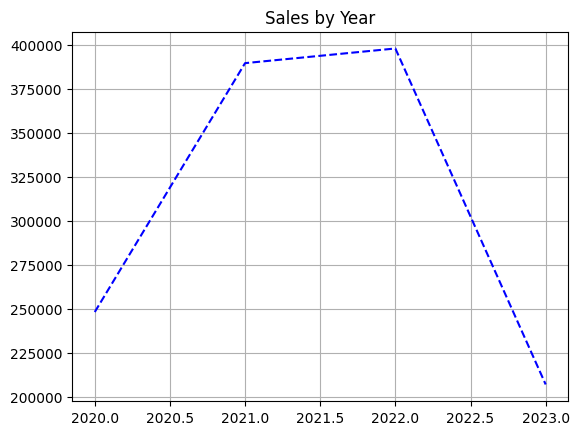

In [23]:
plt.plot(year_sales.index, year_sales.values, 'b--')
plt.title('Sales by Year')
plt.grid()
plt.show()

In [24]:
mon_sales = merged_df.groupby(['Years','Months'],as_index=False)['Profit'].sum()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
mon_sales['Months'] = pd.Categorical(mon_sales['Months'], categories=month_order, ordered=True)
mon_sales = mon_sales.sort_values(['Years', 'Months'])

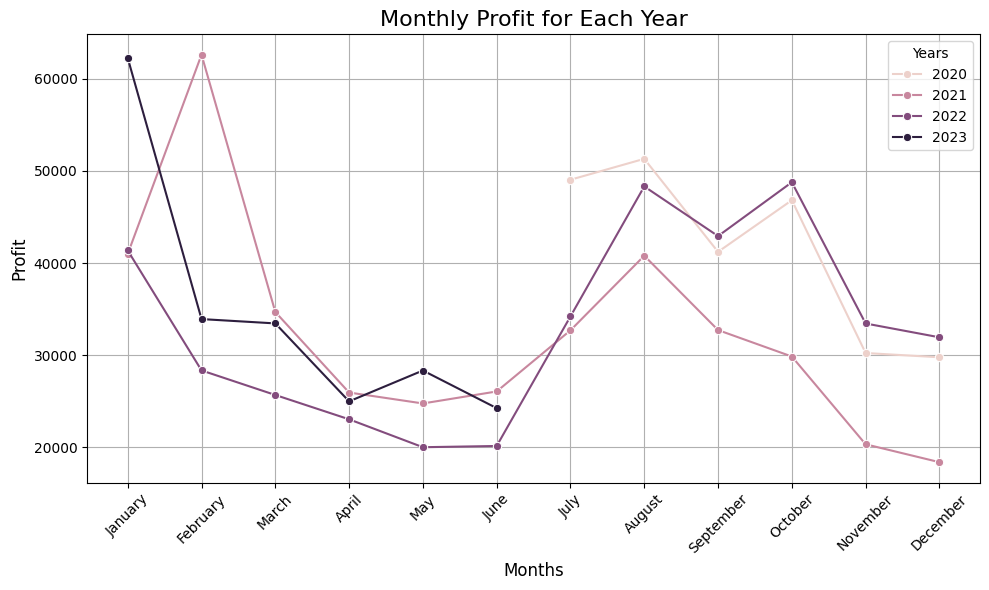

In [25]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=mon_sales, x='Months', y='Profit', hue='Years', marker='o')


plt.title('Monthly Profit for Each Year', fontsize=16)
plt.xlabel('Months', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Years')
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
weekly_sales = merged_df.groupby(['Years', 'Weeks'],as_index=False)['Profit'].sum()
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_sales['Weeks'] = pd.Categorical(weekly_sales['Weeks'], categories=week_order, ordered=True)
weekly_sales = weekly_sales.sort_values(['Years', 'Weeks'])

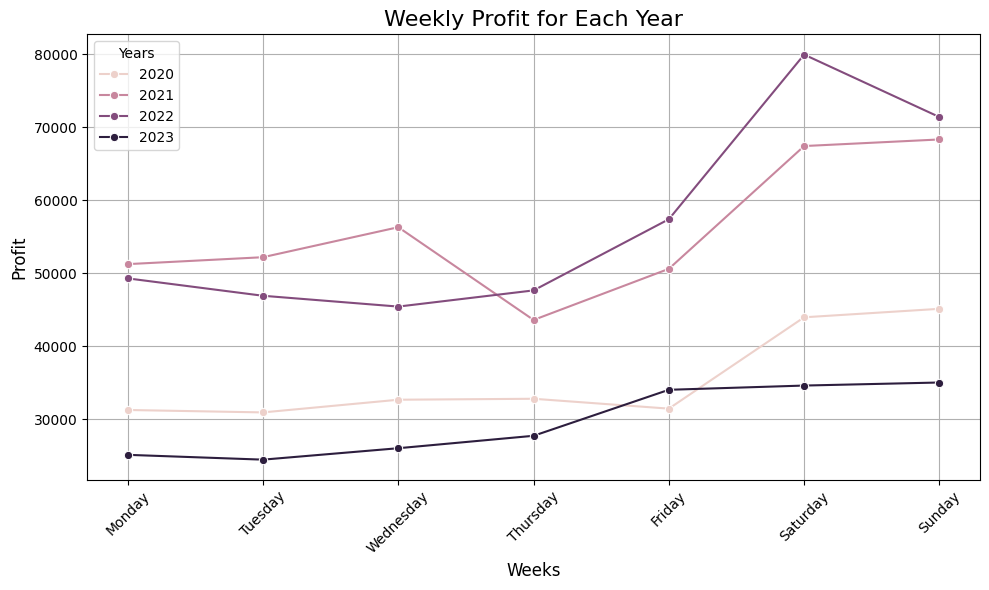

In [27]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=weekly_sales, x='Weeks', y='Profit', hue='Years', marker='o')


plt.title('Weekly Profit for Each Year', fontsize=16)
plt.xlabel('Weeks', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Years')
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
merged_df['Time'] = pd.to_datetime(merged_df['Time'])
merged_df['Hours'] = merged_df['Time'].dt.hour
hours_sales = merged_df.groupby('Hours')['Profit'].sum()

<ipython-input-28-83d73ac2e59d>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_df['Time'] = pd.to_datetime(merged_df['Time'])


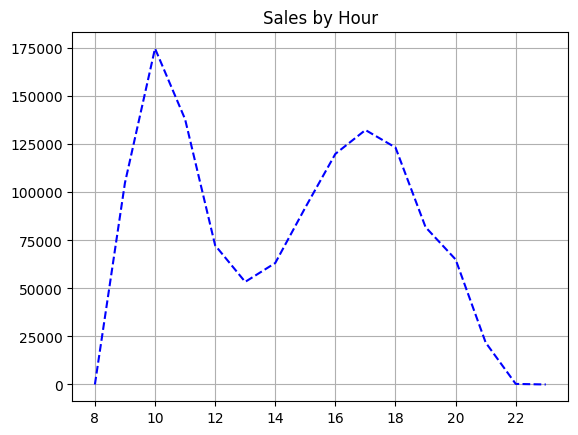

In [29]:
plt.plot(hours_sales.index, hours_sales.values, 'b--')
plt.title('Sales by Hour')
plt.grid()
plt.show()

In [30]:
merged_df.sample(1)

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Item Name,Category Name,Wholesale Price (RMB/kg),Sales,Profit,Weeks,Months,Years,Hours
732941,2022-12-13,2025-06-08 14:08:50.798,106949711300259,1.0,4.5,sale,Needle Mushroom (Box),Edible Mushroom,3.01,4.5,1.49,Tuesday,December,2022,14


In [31]:
hour_year = merged_df.groupby(['Years', 'Hours'],as_index = False)['Profit'].sum()

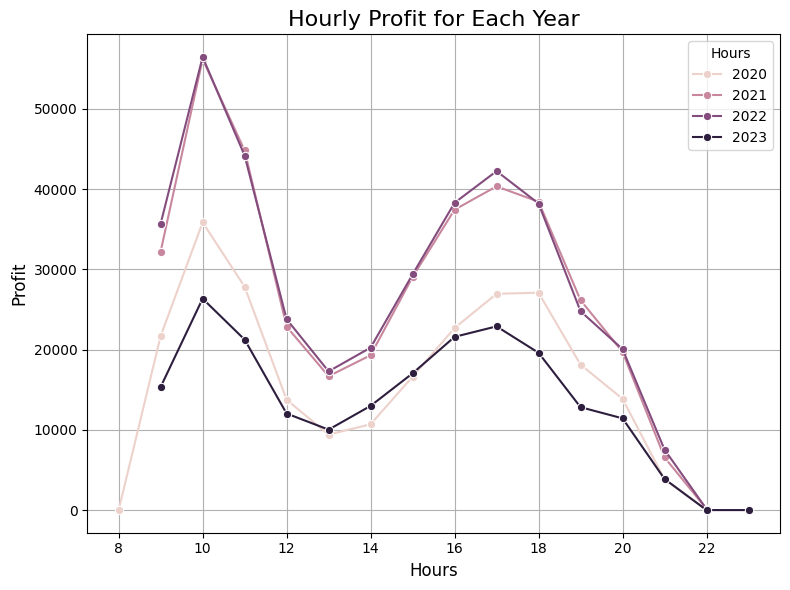

In [32]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=hour_year, x='Hours', y='Profit', hue='Years', marker='o')


plt.title('Hourly Profit for Each Year', fontsize=16)
plt.xlabel('Hours', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.legend(title='Hours')
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
merged_df.sample(3)

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Item Name,Category Name,Wholesale Price (RMB/kg),Sales,Profit,Weeks,Months,Years,Hours
261972,2021-03-15,2025-06-08 18:34:08.030,102900051004294,0.184,12.0,sale,Green Line Pepper,Capsicum,8.37,2.208,0.66792,Monday,March,2021,18
827550,2023-04-08,2025-06-08 18:52:31.023,102900011032251,1.000,7.5,sale,Luosi Pepper (Bag),Capsicum,4.13,7.500,3.37000,Saturday,April,2023,18
345152,2021-06-27,2025-06-08 18:40:00.793,102900005116530,0.182,16.0,sale,Xixia Mushroom (1),Edible Mushroom,12.00,2.912,0.72800,Sunday,June,2021,18


<Figure size 1200x800 with 0 Axes>

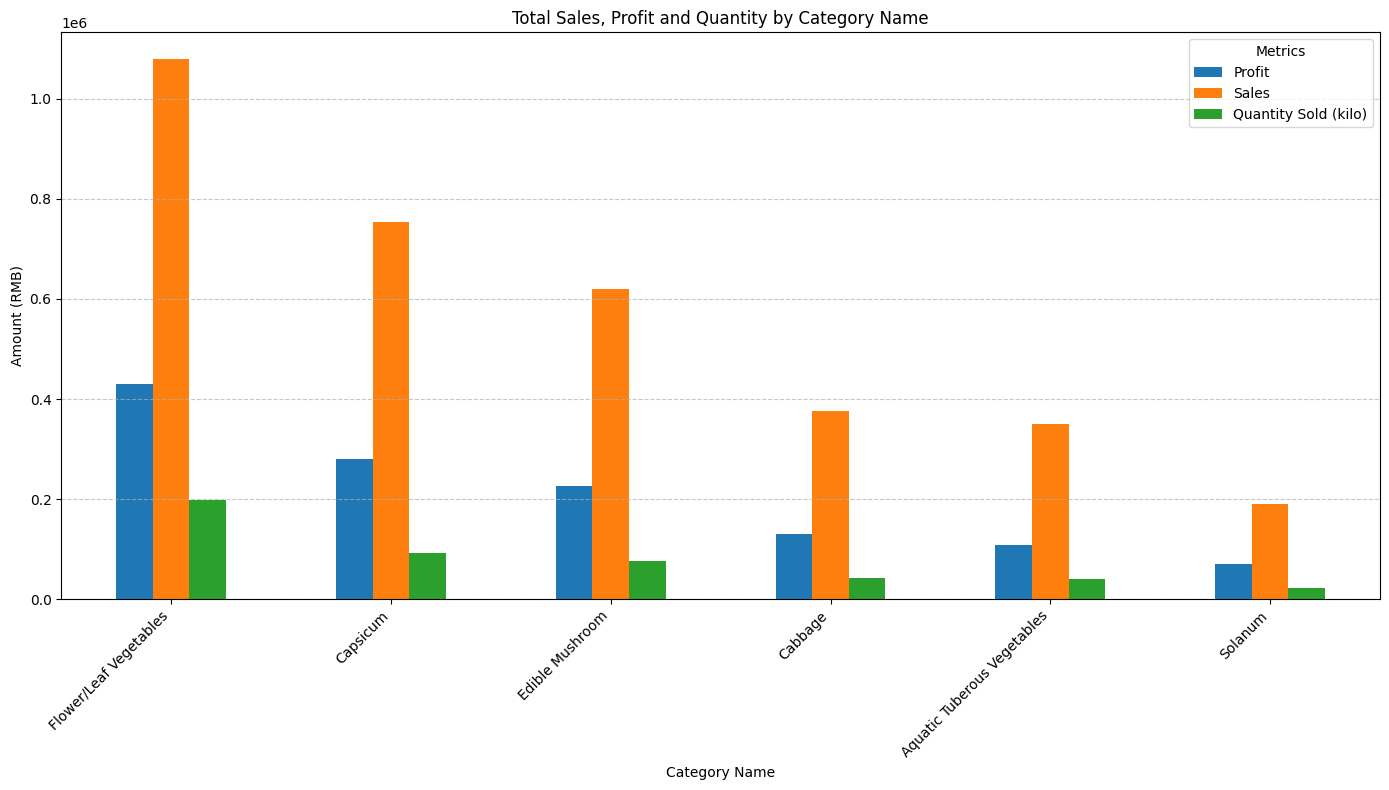

In [34]:
category_sales_profit = merged_df.groupby('Category Name')[['Profit','Sales','Quantity Sold (kilo)']].sum().sort_values(by='Profit', ascending=False)

# Plotting
plt.figure(figsize=(12,8))
category_sales_profit[['Profit','Sales','Quantity Sold (kilo)']].plot(kind='bar', figsize=(14,8))

plt.title('Total Sales, Profit and Quantity by Category Name')
plt.xlabel('Category Name')
plt.ylabel('Amount (RMB)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Metrics')

plt.tight_layout()
plt.show()

In [35]:
import re

def clean_item_name(name):
    name = re.sub(r'\s*\(.*?\)', '', name)
    return name.strip()

merged_df['Item Name'] = merged_df['Item Name'].apply(clean_item_name)

In [36]:
merged_df.groupby('Item Name')[['Profit','Sales','Quantity Sold (kilo)']].sum().sort_values(by='Profit', ascending=False).head(10)

,Profit,Sales,Quantity Sold (kilo)
Item Name,,,
Broccoli,90138.82333,269880.9572,27537.899
Xixia Mushroom,71470.52709,211198.3864,11920.227
Net Lotus Root,63647.26391,214575.9951,27560.461
Wuhu Green Pepper,61393.60808,205113.6991,28164.331
Yunnan Shengcai,49977.54074,129756.9615,15910.461
Needle Mushroom,47568.93073,126316.3063,28640.785
Luosi Pepper,45855.40452,122729.2451,16027.181
Millet Pepper,43324.18910,95909.9079,12280.353
Eggplant,42016.41587,120967.1285,13899.159


<Figure size 1200x800 with 0 Axes>

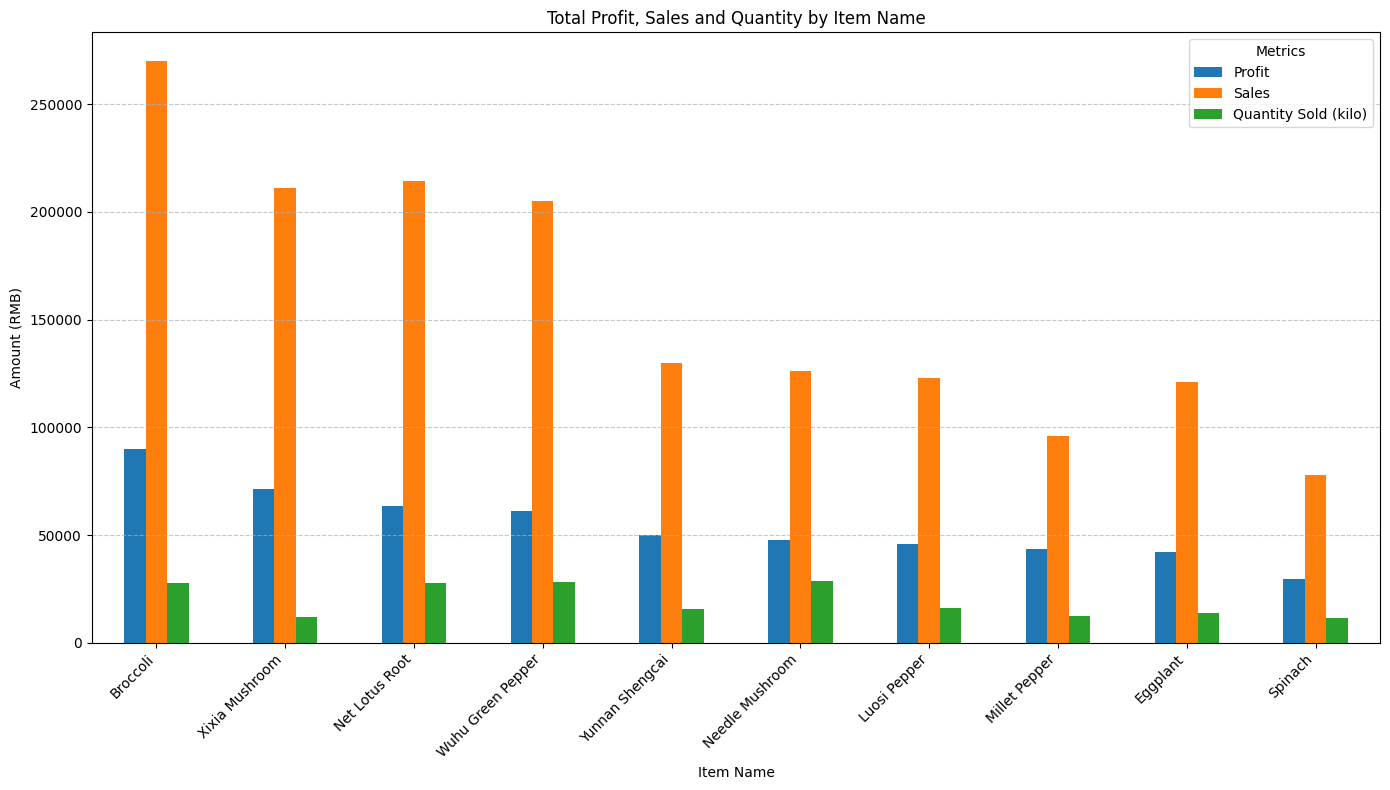

In [37]:
item_sales_profit = merged_df.groupby('Item Name')[['Profit','Sales','Quantity Sold (kilo)']].sum().sort_values(by='Profit', ascending=False).head(10)

plt.figure(figsize=(12,8))
item_sales_profit[['Profit','Sales','Quantity Sold (kilo)']].plot(kind='bar', figsize=(14,8))

plt.title('Total Profit, Sales and Quantity by Item Name')
plt.xlabel('Item Name')
plt.ylabel('Amount (RMB)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Metrics')

plt.tight_layout()
plt.show()

In [38]:
merged_df.groupby('Item Name')[['Profit','Sales','Quantity Sold (kilo)']].sum().sort_values(by='Quantity Sold (kilo)', ascending=False).head(10)

,Profit,Sales,Quantity Sold (kilo)
Item Name,,,
Needle Mushroom,47568.93073,126316.3063,28640.785
Wuhu Green Pepper,61393.60808,205113.6991,28164.331
Net Lotus Root,63647.26391,214575.9951,27560.461
Broccoli,90138.82333,269880.9572,27537.899
Chinese Cabbage,26605.03069,68476.0366,21235.521
Luosi Pepper,45855.40452,122729.2451,16027.181
Yunnan Shengcai,49977.54074,129756.9615,15910.461
Yunnan Lettuce,25562.72000,63994.9000,14325.000
Eggplant,42016.41587,120967.1285,13899.159


<Figure size 1200x800 with 0 Axes>

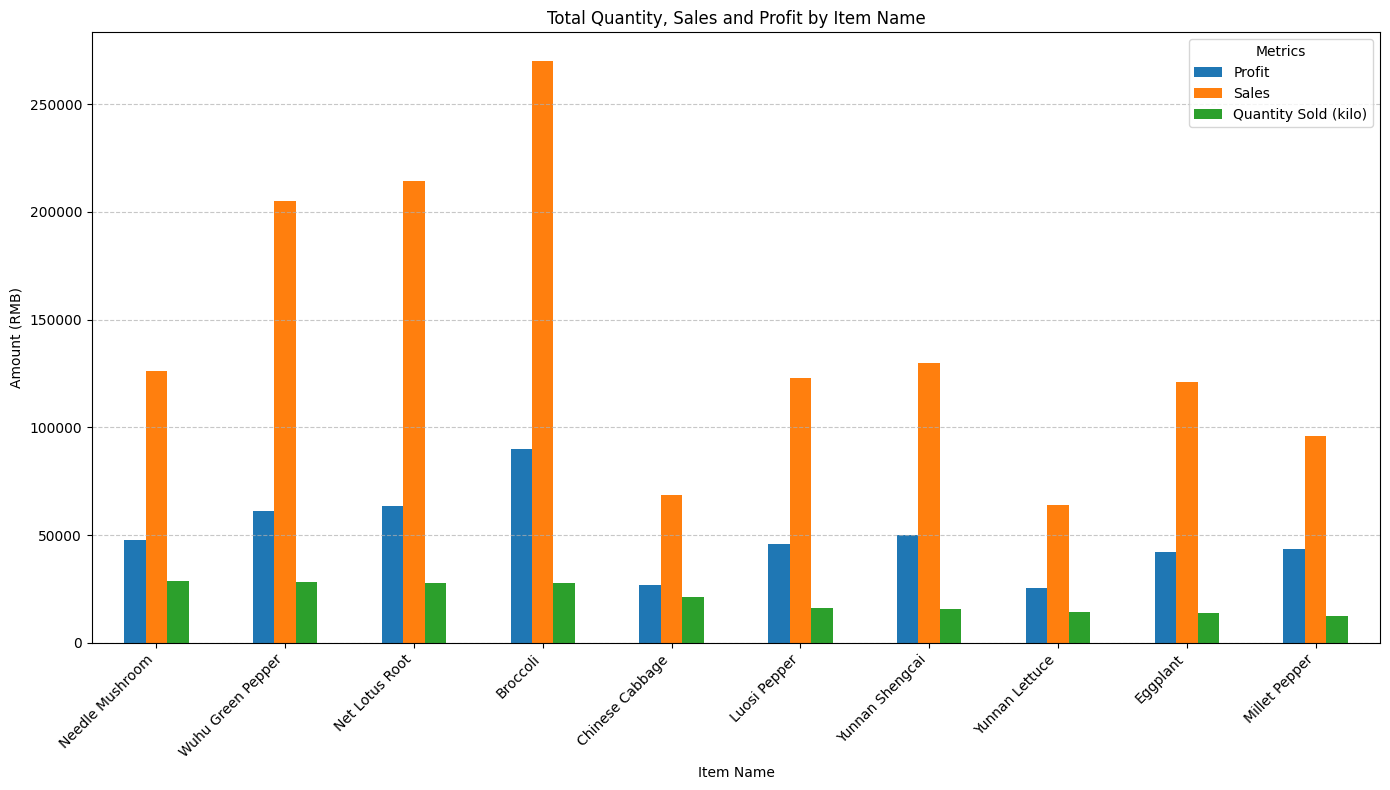

In [39]:
item_sales_profit = merged_df.groupby('Item Name')[['Profit','Sales','Quantity Sold (kilo)']].sum().sort_values(by='Quantity Sold (kilo)', ascending=False).head(10)

plt.figure(figsize=(12,8))
item_sales_profit[['Profit','Sales','Quantity Sold (kilo)']].plot(kind='bar', figsize=(14,8))

plt.title('Total Quantity, Sales and Profit by Item Name')
plt.xlabel('Item Name')
plt.ylabel('Amount (RMB)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Metrics')

plt.tight_layout()
plt.show()

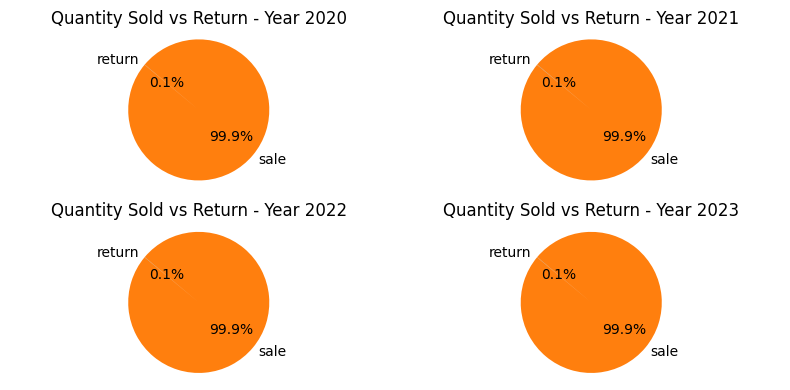

In [40]:
year_sale_return = merged_df.groupby(['Years', 'Sale or Return'])['Quantity Sold (kilo)'].sum().reset_index()
years = sorted(year_sale_return['Years'].unique())

fig, axes = plt.subplots(2, 2, figsize=(8, 4))

axes = axes.flatten()

for i, year in enumerate(years[:4]):
    data = year_sale_return[year_sale_return['Years'] == year]
    labels = data['Sale or Return']
    sizes = data['Quantity Sold (kilo)'].abs()

    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Quantity Sold vs Return - Year {year}')
    axes[i].axis('equal')

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()
